Credit Card

In [406]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [407]:
data = pd.read_csv('CC GENERAL - CC GENERAL.csv')

In [408]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [409]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [410]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [411]:
data = data.fillna(data['CREDIT_LIMIT'].mean())

In [412]:
data['PAYMENTS'][data['MINIMUM_PAYMENTS'].isna()].value_counts()

Series([], Name: PAYMENTS, dtype: int64)

In [413]:
data.drop('CUST_ID',axis=1,inplace=True)

In [414]:

data = data[['BALANCE','BALANCE_FREQUENCY','PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','CREDIT_LIMIT']]
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT
0,40.900749,0.818182,0.166667,0.000000,1000.0
1,3202.467416,0.909091,0.000000,0.250000,7000.0
2,2495.148862,1.000000,1.000000,0.000000,7500.0
3,1666.670542,0.636364,0.083333,0.083333,7500.0
4,817.714335,1.000000,0.083333,0.000000,1200.0


In [415]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT
0,40.900749,0.818182,0.166667,0.000000,1000.0
1,3202.467416,0.909091,0.000000,0.250000,7000.0
2,2495.148862,1.000000,1.000000,0.000000,7500.0
3,1666.670542,0.636364,0.083333,0.083333,7500.0
4,817.714335,1.000000,0.083333,0.000000,1200.0


In [416]:
X_train, X_test= train_test_split(data, test_size=.2, random_state=42)

In [417]:
mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)

In [418]:
X_train_scaled[0][0]

0.008744064875406759

In [419]:
train_data = pd.DataFrame(data=X_train_scaled, columns=data.columns)

In [420]:
train_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT
0,0.008744,0.777778,0.777778,0.000000,0.081803
1,0.171255,1.000000,0.000000,0.055555,0.215359
2,0.027751,1.000000,0.000000,0.555555,0.031720
3,0.001304,0.636364,0.916667,0.000000,0.065109
4,0.188987,1.000000,0.083333,0.166667,0.198664
...,...,...,...,...,...
7155,0.056666,1.000000,1.000000,0.000000,0.038397
7156,0.043771,1.000000,0.000000,0.222222,0.081803
7157,0.002113,0.181818,0.000000,0.055555,0.048414
7158,0.000000,0.000000,0.750000,0.000000,0.131886


In [421]:
inertias= []
kmax = 20
for k in range(2, kmax+1):
    kmeans= KMeans(n_clusters=k).fit(train_data)
    inertias.append(kmeans.inertia_)

print(inertias)

[871.8894007707605, 589.9593356471593, 488.0862851560268, 433.9221901290985, 384.73420540538075, 339.0206441827294, 318.1185596568037, 293.46781401594166, 273.92028589281625, 255.07117110824535, 238.74316069404787, 227.39499914206732, 214.2763151869156, 205.97828218259923, 199.99399629747, 192.94974138099587, 183.52748221383638, 179.4550969454431, 174.0185477306482]


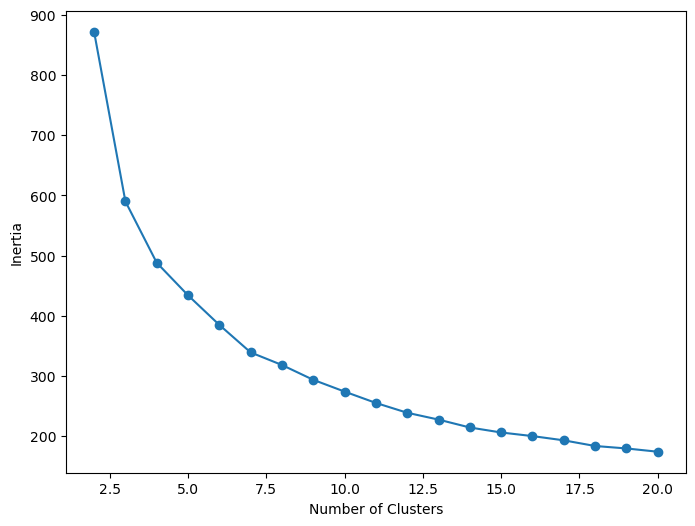

In [422]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 21), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [423]:
# kmeans1 = KMeans(n_clusters=3, n_init=50, max_iter=50)
kmeans = KMeans(n_clusters=7)
trans = kmeans.fit_transform(train_data)

In [424]:
labels=kmeans.labels_
train_data['LABELS'] = labels
train_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,LABELS
0,0.008744,0.777778,0.777778,0.000000,0.081803,0
1,0.171255,1.000000,0.000000,0.055555,0.215359,3
2,0.027751,1.000000,0.000000,0.555555,0.031720,1
3,0.001304,0.636364,0.916667,0.000000,0.065109,6
4,0.188987,1.000000,0.083333,0.166667,0.198664,3


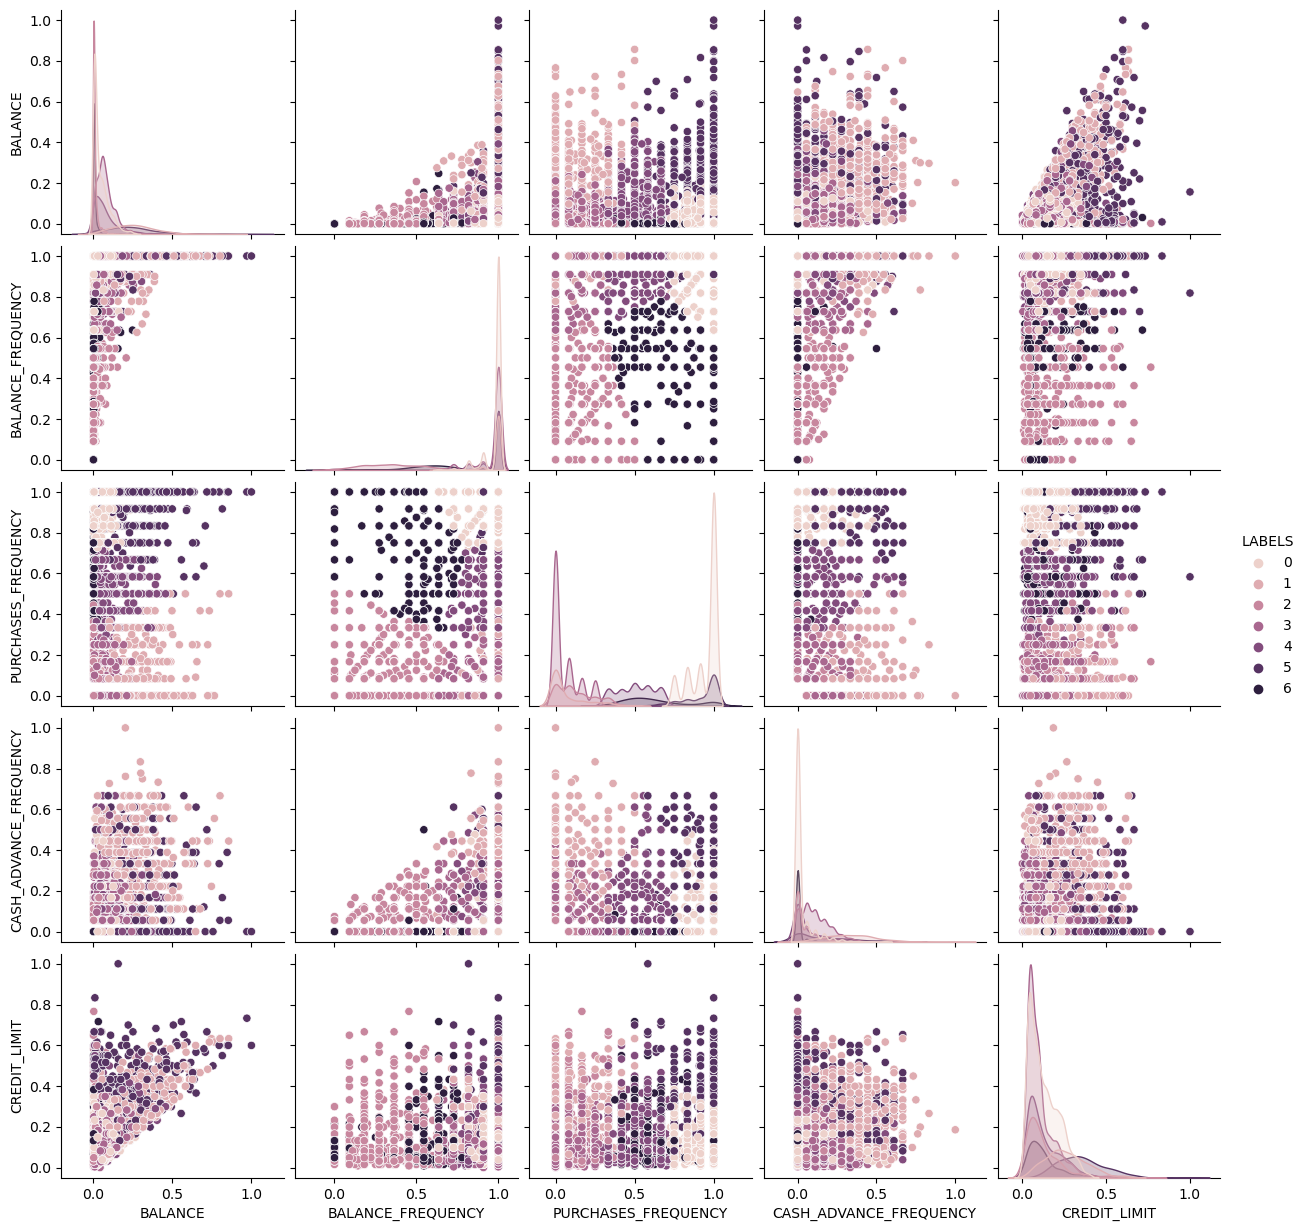

In [425]:
sns.pairplot(train_data,hue='LABELS')

In [426]:
data2 = train_data[['BALANCE', 'CREDIT_LIMIT']]
kmeans2 = KMeans(n_clusters=7, n_init=30)
trans2 = kmeans2.fit_transform(data2)
labels2=kmeans2.labels_
data2['LABELS'] = labels2

C:\Users\The user\AppData\Local\Temp\ipykernel_21692\2813195397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['LABELS'] = labels2


<AxesSubplot:xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

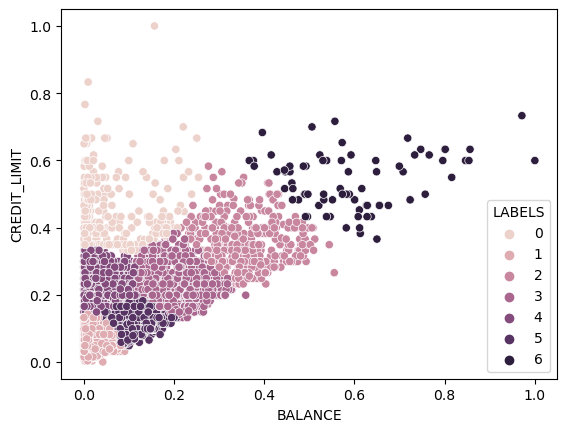

In [427]:
sns.scatterplot(data= data2, x='BALANCE', y='CREDIT_LIMIT', hue='LABELS')

In [428]:
test_df = pd.DataFrame(X_test_scaled, columns= data.columns)
test_df = test_df[['BALANCE', 'CREDIT_LIMIT']]

In [429]:
predictions = kmeans.fit_predict(test_df)

In [430]:
labels_p=predictions
test_df['LABELS'] = labels_p

<AxesSubplot:xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

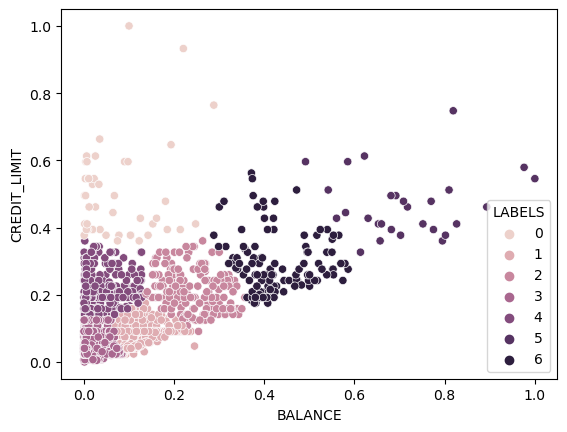

In [431]:
sns.scatterplot(data= test_df, x='BALANCE', y='CREDIT_LIMIT', hue='LABELS')

<AxesSubplot:xlabel='BALANCE', ylabel='CREDIT_LIMIT'>

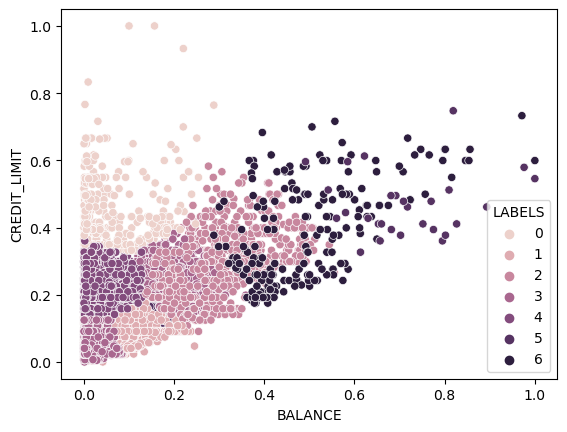

In [432]:
combined_df = pd.concat([data2, test_df])

# Create the scatter plot with hue set to 'Set'
sns.scatterplot(data=combined_df, x='BALANCE', y='CREDIT_LIMIT', hue='LABELS')

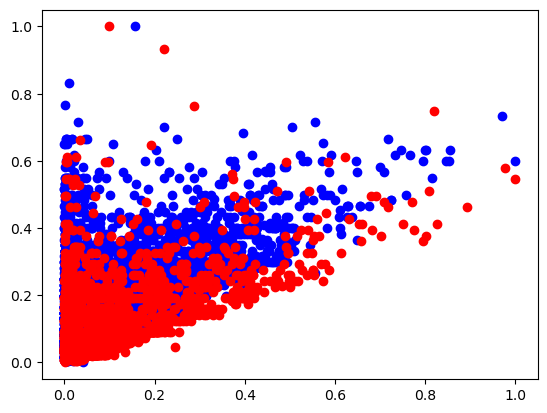

In [433]:
plt.scatter(data= data2, x='BALANCE', y='CREDIT_LIMIT', c='blue', label='Train Set')
plt.scatter(data= test_df, x='BALANCE', y='CREDIT_LIMIT', c='red', label='Test Set')